In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import matplotlib.pyplot as plt

/Users/parkchanjin/PycharmProjects/ml-work/venv/lib/python3.7/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



# Loading data

In [2]:
# Regional Confirmed cases dataframe across the world
# 전세계 지역 별 확진자 dataframe
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

# Regional Deceases cases dataframe across the world
# 전세계 지역 별 사망자 dataframe
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
death = pd.read_csv(url, error_bad_lines=False)

# Regional Recovered cases dataframe across the world
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recover = pd.read_csv(url, error_bad_lines=False)

In [3]:
df_korea = confirmed[confirmed['Country/Region'] == 'Korea, South']
df_korea

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
158,NaN,"Korea, South",36.0,128.0,1,1,2,2,3,4,...,4335,5186,5621,6088,6593,7041,7314,7478,7513,7755


# Mining data

In [4]:
df_korea = df_korea.T[4:]

# Make Korean confirmed timeseries dataframe into two rows: date and number of confirmed cases
# 한국 확진자 시계열 데이터프레임을 두 개의 열로 만듭니다: 날짜, 확진자 수
df_korea = df_korea.reset_index().rename(columns={'index': 'date', 158: 'confirmed'})

df_korea['date'] = pd.to_datetime(df_korea['date'])

# Check the most recent 5 days of Korean confirmed cases 
# 한국 확진자 시계열 데이터프레임의 제일 최근 5일 간의 데이터를 확인합니다
df_korea.tail()

,date,confirmed
45,2020-03-07,7041
46,2020-03-08,7314
47,2020-03-09,7478
48,2020-03-10,7513
49,2020-03-11,7755


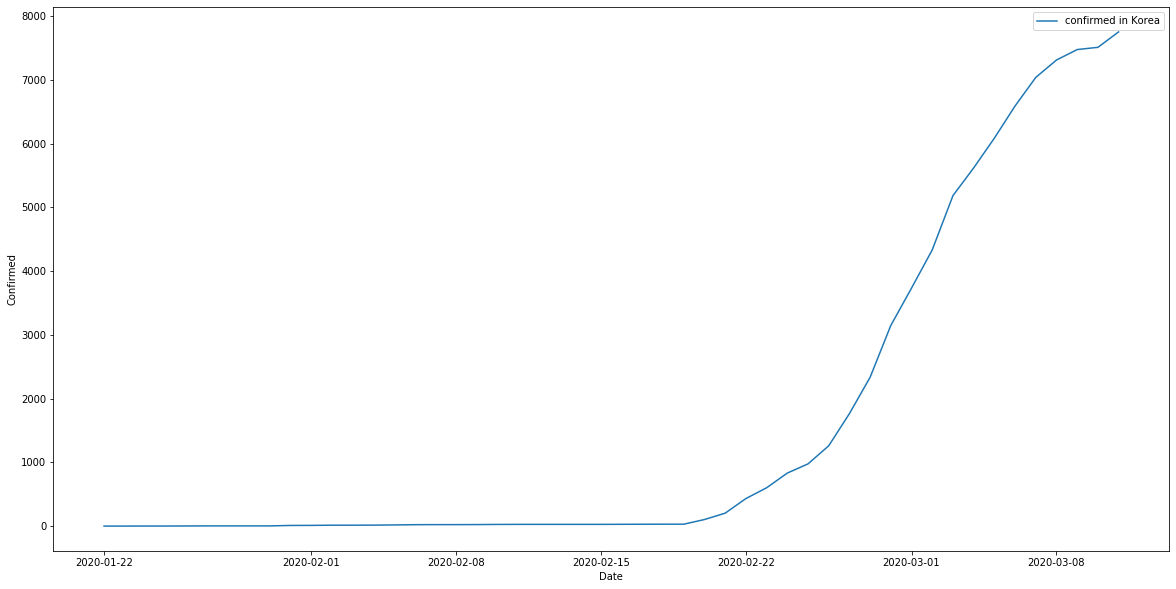

In [5]:
plt.figure(facecolor='white', figsize=(20, 10))

plt.plot(df_korea.date, df_korea.confirmed, 
            label="confirmed in Korea")
plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.legend()
plt.show()

In [6]:
df_prophet = df_korea.rename(columns={
    'date': 'ds',
    'confirmed': 'y'
})

df_prophet.tail()

,ds,y
45,2020-03-07,7041
46,2020-03-08,7314
47,2020-03-09,7478
48,2020-03-10,7513
49,2020-03-11,7755


# Model: Facebook Prophet

In [7]:
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible
    changepoint_range=0.98, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

m.fit(df_prophet)

In [8]:
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
50,2020-03-12,7857.758108,7806.475847,7911.537059,7845.236213,7874.827274,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,0.0,0.0,0.0,7855.867678
51,2020-03-13,7990.353835,7911.968058,8065.777202,7929.700462,8056.469252,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,0.0,0.0,0.0,7988.463405
52,2020-03-14,8122.949562,7985.822711,8269.591932,7998.004010,8257.841558,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,0.0,0.0,0.0,8121.059132
53,2020-03-15,8255.545289,8028.711002,8476.478477,8043.877085,8476.635082,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,0.0,0.0,0.0,8253.654859
54,2020-03-16,8388.141016,8061.375451,8723.501544,8070.887881,8729.319908,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,0.0,0.0,0.0,8386.250586
55,2020-03-17,8520.736743,8119.383034,8975.726797,8106.427493,8977.661669,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,0.0,0.0,0.0,8518.846313
56,2020-03-18,8653.332470,8106.936609,9234.425829,8116.968564,9233.253087,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,-1.89043,0.0,0.0,0.0,8651.442040


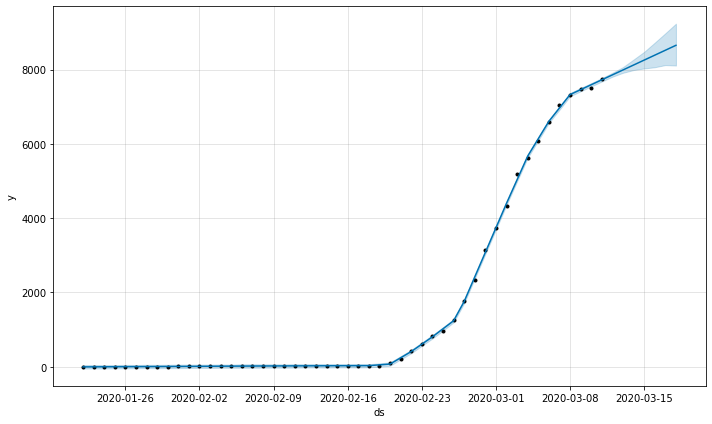

In [9]:
fig = m.plot(forecast)

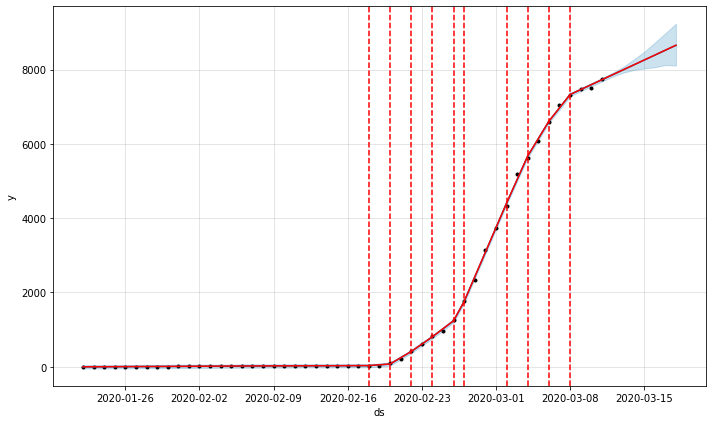

In [10]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)